In [10]:
import nltk
import glob, os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# from spellchecker import SpellChecker
import matplotlib.pyplot as plt
from nltk.text import Text
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [11]:
path = 'articles'
os.chdir(path)

In [12]:
tokenizer = RegexpTokenizer(r'\w+')
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

def remove_whitespace(text):
    return  " ".join(text.split())

def lemmatization(text): 
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result

def stemming(text):
    porter = PorterStemmer()
    result=[]
    for word in text:
        result.append(porter.stem(word))
    return result

In [13]:
# #preprocessing with tokenizer
# def tok_prepro_docs(docs, nouns=False):
#     newd = []
#     newd_sw = []
#     for i in docs:
#         i = i.lower()
#         i = remove_whitespace(i)
#         date = re.findall(r'(\d+/\d+/\d+)', i)
#         date2 = re.findall(r'(\d+\s(?:jan|feb|mar|apr|may|jun|jul|aug|oct|sep|nov|dec|january|february|march|april|may|june|july|august|september|october|november|december|January|February|March|April|May|June|July|August|September|October|November|December)\s\d+)',
#                            i)
#         dates = (date + date2)
#         for x in dates:
#             i = i.replace(x, '')
#         i = i.translate(str.maketrans('', '', string.punctuation)) 
#         i = i.replace('ÿ', '')
#         i = tokenizer.tokenize(i)
#         if nouns:
#             tags = nltk.pos_tag(i)
#             nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
#            # i = spell_check(i)
#             newd_sw.append(nouns)
#             newi = [w for w in nouns if not w.lower() in stop_words]
#         else:
#             newd_sw.append(i)
#             newi = [w for w in i if not w.lower() in stop_words]
# #         newi = lemmatization(newi)
# #         newi = stemming(newi)
#         newd.append(newi)
#     return newd

# def no_tok_prepro_docs(docs):
#     texts = []
#     newd_sw = []
#     for i in documents:
#         i = i.lower()
#         i = remove_whitespace(i)
#         date = re.findall(r'(\d+/\d+/\d+)', i)
#         date2 = re.findall(r'(\d+\s(?:jan|feb|mar|apr|may|jun|jul|aug|oct|sep|nov|dec|january|february|march|april|may|june|july|august|september|october|november|december|January|February|March|April|May|June|July|August|September|October|November|December)\s\d+)',
#                            i)
#         dates = (date + date2)
#         for x in dates:
#             i = i.replace(x, '')
#         texts.append(i)
#     return texts

In [14]:
# def create_heatmap(similarity, cmap = "YlGnBu"):
#   df = pd.DataFrame(similarity)
#   fig, ax = plt.subplots(figsize=(50,50))
#   sns.heatmap(df, cmap=cmap)

def sorted_alphanumeric(path):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(path, key=alphanum_key)

# def create_tsne():
#     """
#     This function will performs the TSNE dimensionality reduction on the articles, historical documents, resumes.
#     """
#     ordered_dir = sorted_alphanumeric(os.listdir())
#     documents = [open(f).read() for f in ordered_dir]
#     tfidf = TfidfVectorizer().fit_transform(documents)
#     pca = PCA(n_components=2)
#     df = pca.fit_transform(tfidf.todense())
#     return df


# def plot_tsne_kmeans(k, df):
#     """
#     This function will take the pca's as input and convert it to a k-means plot
#     k  -> number of means (clusters)
#     df -> dataframe containing pca values 
#     """
#     kmeans = KMeans(n_clusters= k)
#     label = kmeans.fit_predict(df)
#     dff = pd.DataFrame(df, columns=['tsne1', 'tsne2'])
#     dff['label'] = [str(i) for i in label]
#     dff['label2']= label
#     dff['article'] = [i for i in range(845)]
#     df = dff.sort_values(by='label2')
#     df = df[['tsne1', 'tsne2', 'label', 'article']]
#     return px.scatter(df, x='tsne1', y='tsne2', color="label", hover_data=['article']), df
 
# def make_bar(docs, size=20, flatten=True):
#     if flatten:
#         freq = nltk.FreqDist(make_flat(docs))
#     else:
#         freq = nltk.FreqDist(docs)
#     testcloud = freq.most_common(size)
#     freqdf = pd.DataFrame(testcloud, columns=['Word', 'Frequency'])
#     sns.set(rc={'figure.figsize':(16,11)})
#     sns.barplot(x='Frequency',y='Word', data=freqdf)

# def make_wc(docs, size=20, flatten=True):
#     if flatten:
#         freq = nltk.FreqDist(make_flat(docs))
#     else:
#         freq = nltk.FreqDist(docs)
#     testcloud = freq.most_common(size)
#     freqdf = pd.DataFrame(testcloud, columns=['Word', 'Frequency'])
#     dataa = freqdf.set_index('Word').to_dict()['Frequency']
#     wc = WordCloud(background_color='white', width=800, height=400, max_words=200).generate_from_frequencies(dataa)
#     plt.figure(figsize=(12,12))
#     plt.imshow(wc, interpolation='bilinear')
#     plt.axis('off')
#     plt.show()

# def make_flat(docs):
#     doclist = tok_prepro_docs(docs)
    
#     flat_list = [item for sublist in doclist for item in sublist]
    
#     return flat_list

In [15]:
ordered_dir = sorted_alphanumeric(os.listdir())
documents = [open(f).read() for f in ordered_dir]

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("german")

In [17]:
def text_clean_tokenize(lines):
    
    review_lines = list()

    # lines = article_data['Body'].values.astype(str).tolist()

    for line in lines:
        tokens = word_tokenize(line)
        tokens = [w.lower() for w in tokens]
        table = str.maketrans('','',string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words('german'))
        words = [w for w in words if not w in stop_words]
        words = [stemmer.stem(w) for w in words]

        review_lines.append(words)
    return(review_lines)
    
    
review_lines = text_clean_tokenize(documents)

In [18]:
import gensim
import spacy


In [22]:
from gensim.models import Word2Vec

In [24]:
model =  Word2Vec(sentences = review_lines, vector_size=100, window=5, min_count=1, workers=4)


In [37]:
df_lst = []
for i in range(len(documents)):
    df_lst.append([i, documents[i]])
article_data = pd.DataFrame(df_lst, columns=['ID_Article', 'Body'])

In [27]:
article_data

,IDArticle,Body
0,0,The Orb\n\n\nBUMP OF PROTESTS IN ABILA IN RESP...
1,1,The Light of Truth\n\nENORMOUS IPO MAKES THE B...
2,2,Everyday News\n\nGlobal boxes of the charity o...
3,3,"The Tulip\n\nPROMINENT MATTER, BURGERMATRIJZEN..."
4,4,"News Online Today\n\nELODIS, KRONOS: HELP FRO..."
...,...,...
840,840,The Orb\n\nTHE DEMONSTRATION ATTRACTS THOUSAND...
841,841,Centrum Sentinel\nVOICES - a blog approximatel...
842,842,Homeland Illumination\nVOICES - a blog about w...
843,843,The Wrap\n\nDEMONSTRATION ATTRACTS THOUSANDS I...


In [32]:
# ! python -m spacy download de_core_news_sm

In [33]:
import de_core_news_sm
nlp = de_core_news_sm.load()

In [39]:
def tokenize(sent):
    doc = nlp.tokenizer(sent)
    return [token.lower_ for token in doc if not token.is_punct]

new_df = (article_data['Body'].apply(tokenize).apply(pd.Series))

new_df = new_df.stack()
new_df = (new_df.reset_index(level=0)
                .set_index('level_0')
                .rename(columns={0: 'word'}))

new_df = new_df.join(article_data.drop('Body', 1), how='left')

new_df = new_df[['word','ID_Article']]
word_list = list(model.wv.key_to_index)
vectors = model.wv[word_list]
vectors_df = pd.DataFrame(vectors)
vectors_df['word'] = word_list
merged_frame = pd.merge(vectors_df, new_df, on='word')
merged_frame_rolled_up = merged_frame.drop('word',axis=1).groupby(['ID_Article']).mean().reset_index()
del merged_frame
del new_df
del vectors

C:\Users\20183046\AppData\Local\Temp\ipykernel_16892\3255762914.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df = new_df.join(article_data.drop('Body', 1), how='left')


In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
data_subset = merged_frame_rolled_up.drop(['ID_Article'],axis=1).values

from sklearn.cluster import KMeans
number_of_clusters = range(1,20,5)
kmeans = [KMeans(n_clusters=i,max_iter=5,init='k-means++') for i in number_of_clusters]
score = [kmeans[i].fit(data_subset).inertia_ for i in range(len(kmeans))]
tmp =0
best_k = 0
value_all = 0
diff1 = []
for i in range(len(score)-1):
    
    scores = (score[i] - score[i+1])
    diff1.append(scores)
    
diff2=[]
for i in range(len(diff1)-1):
    difference = diff1[i] - diff1[i+1]
    diff2.append(difference)
diff2.insert(0, 0) 
diff3 = [i-j for i,j in zip(diff2,diff1)]

m = max(i for i in diff3)
best_k = number_of_clusters[diff3.index(m)]
print(best_k)

kmeans = KMeans(n_clusters=best_k,init='k-means++',max_iter=5).fit(data_subset)
labels = kmeans.labels_
merged_frame_rolled_up['labels'] = labels

c:\Users\20183046\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


6


c:\Users\20183046\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\20183046\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 845 samples in 0.000s...
[t-SNE] Computed neighbors for 845 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 845 / 845
[t-SNE] Mean sigma: 0.095504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.295212
[t-SNE] KL divergence after 3000 iterations: 0.880511


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

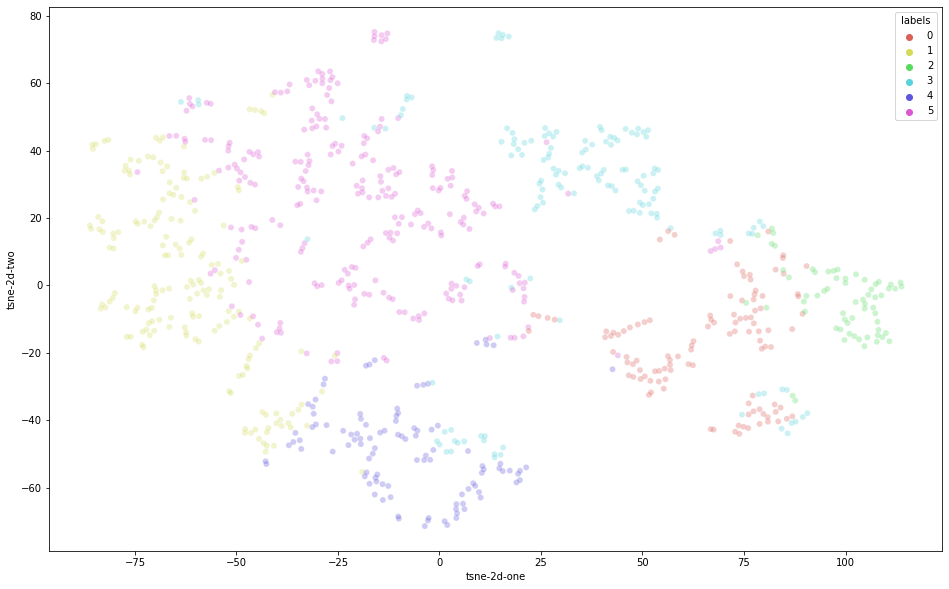

In [42]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=3000,init='pca',random_state=42)
tsne_results = tsne.fit_transform(data_subset)
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

merged_frame_rolled_up['tsne-2d-one'] = tsne_results[:,0]
merged_frame_rolled_up['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = 'labels',
    palette=sns.color_palette("hls", len(merged_frame_rolled_up['labels'].unique())),
    data=merged_frame_rolled_up,
    legend="full",
    alpha=0.3
)

In [47]:
## Interactive t-SNE mapping using https://www.kaggle.com/maksimeren/covid-19-literature-clustering

from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure

output_notebook()

# data sources
source = ColumnDataSource(data=dict(
    x= merged_frame_rolled_up['tsne-2d-one'].values, 
    y= merged_frame_rolled_up['tsne-2d-two'].values, 
    desc= merged_frame_rolled_up['labels'].values, 
    titles= merged_frame_rolled_up['ID_Article'].values
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Article:", "@titles")
])
# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[len(merged_frame_rolled_up['labels'].unique())],
                     low=min(merged_frame_rolled_up['labels'].values) ,high=max(merged_frame_rolled_up['labels'].values))
#prepare the figure
p = figure(plot_width=1000, plot_height=1000, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="Clustering German Articles Based on K Means and Word2Vec", 
           toolbar_location="right")
# plot
p.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black")

# output_file('plots/t-sne_covid-19_interactive.html')
show(p)

Loading BokehJS ...

# DOC2VEC

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
documents2 = tok_prepro_docs(documents)
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(documents2)]

In [ ]:
model = Word2Vec(sentences=documents2, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# model = Word2Vec(docs, vector_size=5, min_count=1, workers=4)

In [ ]:
model.wv.most_similar('elodis', topn=50)

[('rural', 0.9993464350700378),
 ('water', 0.9993060827255249),
 ('citizens', 0.9989604949951172),
 ('community', 0.9989265203475952),
 ('last', 0.9988541007041931),
 ('published', 0.9988427758216858),
 ('government', 0.9988110661506653),
 ('request', 0.9987709522247314),
 ('poisoning', 0.9987573027610779),
 ('protesters', 0.998754620552063),
 ('violent', 0.9987401366233826),
 ('caused', 0.9987359046936035),
 ('action', 0.998703122138977),
 ('near', 0.9986962080001831),
 ('meetings', 0.9986715316772461),
 ('contamination', 0.998660147190094),
 ('fear', 0.9986294507980347),
 ('became', 0.9986234903335571),
 ('tax', 0.9985954761505127),
 ('bring', 0.9985851049423218),
 ('continue', 0.9985740184783936),
 ('clean', 0.998572051525116),
 ('movement', 0.9985679984092712),
 ('environmental', 0.9985609650611877),
 ('bodrogi', 0.9985561966896057),
 ('fact', 0.9985492825508118),
 ('1998', 0.9985242486000061),
 ('organization', 0.9985092878341675),
 ('health', 0.9984865188598633),
 ('protests', 0.

# LSA

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
texts = tok_prepro_docs(documents, True)

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
#     print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for number_of_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
dic, dtmatrix = prepare_corpus(texts)

In [ ]:
# lsamod = create_gensim_lsa_model(texts, 9, 15)

In [ ]:
number_of_topics=4
words=15
model=create_gensim_lsa_model(texts, number_of_topics, words)

In [ ]:
model.print_topics(num_topics=number_of_topics, num_words=words)

[(0,
  '-0.490*"kronos" + -0.373*"gastech" + -0.354*"government" + -0.222*"pok" + -0.186*"gas" + -0.174*"police" + -0.167*"abila" + -0.162*"karel" + -0.158*"people" + -0.125*"water" + -0.123*"sanjorge" + -0.110*"years" + -0.108*"elodis" + -0.097*"company" + -0.094*"president"'),
 (1,
  '-0.448*"gas" + -0.363*"gastech" + 0.276*"karel" + -0.269*"sanjorge" + 0.262*"pok" + 0.242*"police" + -0.201*"company" + 0.153*"government" + -0.143*"tethys" + -0.134*"energy" + 0.133*"death" + -0.131*"oil" + 0.122*"kronos" + -0.114*"jr" + 0.107*"abila"'),
 (2,
  '0.453*"cotton" + 0.389*"drug" + 0.289*"bianca" + 0.249*"drugs" + 0.193*"people" + -0.188*"gastech" + 0.156*"designer" + 0.144*"candy" + 0.142*"department" + 0.126*"sugar" + -0.121*"pok" + 0.113*"years" + 0.110*"refinery" + 0.105*"caramel" + 0.097*"city"'),
 (3,
  '-0.474*"gas" + 0.374*"gastech" + -0.356*"karel" + 0.199*"kronos" + -0.191*"oil" + -0.180*"death" + -0.163*"police" + -0.146*"years" + -0.126*"energy" + -0.120*"year" + -0.103*"city" +